# Exploratory Data Analysis
Economic News headlines scraped on Feb 2020
## Install packages

In [1]:
!pip install -r requirements.txt

## Import packages

In [2]:
import pandas as pd
from functions import view_wordcloud

%load_ext autoreload
%autoreload 2

In [3]:
headlines = pd.read_csv('./Data/rappler_economic_news.csv')

print(f' Total number of headlines: {headlines.shape[0]}')
headlines.head()

 Total number of headlines: 2986


headlines sentiments       page  \
0   Virus hammers China's February economic activity        Sad   Page: 23   
1  Global economy wavers as world comes to stands...     Afraid   Page: 23   
2  Can the Fed protect U.S. economy against virus...   Inspired   Page: 23   
3  IMF, World Bank funds ready to fight virus out...      Happy   Page: 24   
4     World Bank to attack poverty in conflict zones      Happy   Page: 24   

  president  
0   Duterte  
1   Duterte  
2   Duterte  
3   Duterte  
4   Duterte

**Check total number of sentiments**

In [4]:
headlines.groupby('sentiments').size()

sentiments
Afraid                 193
Amused                 168
Angry                  331
Annoyed                 86
Don't Care              57
Happy                 1363
Inspired               221
People are divided     145
Sad                    419
dtype: int64

**Visualize the headlines to check top words**

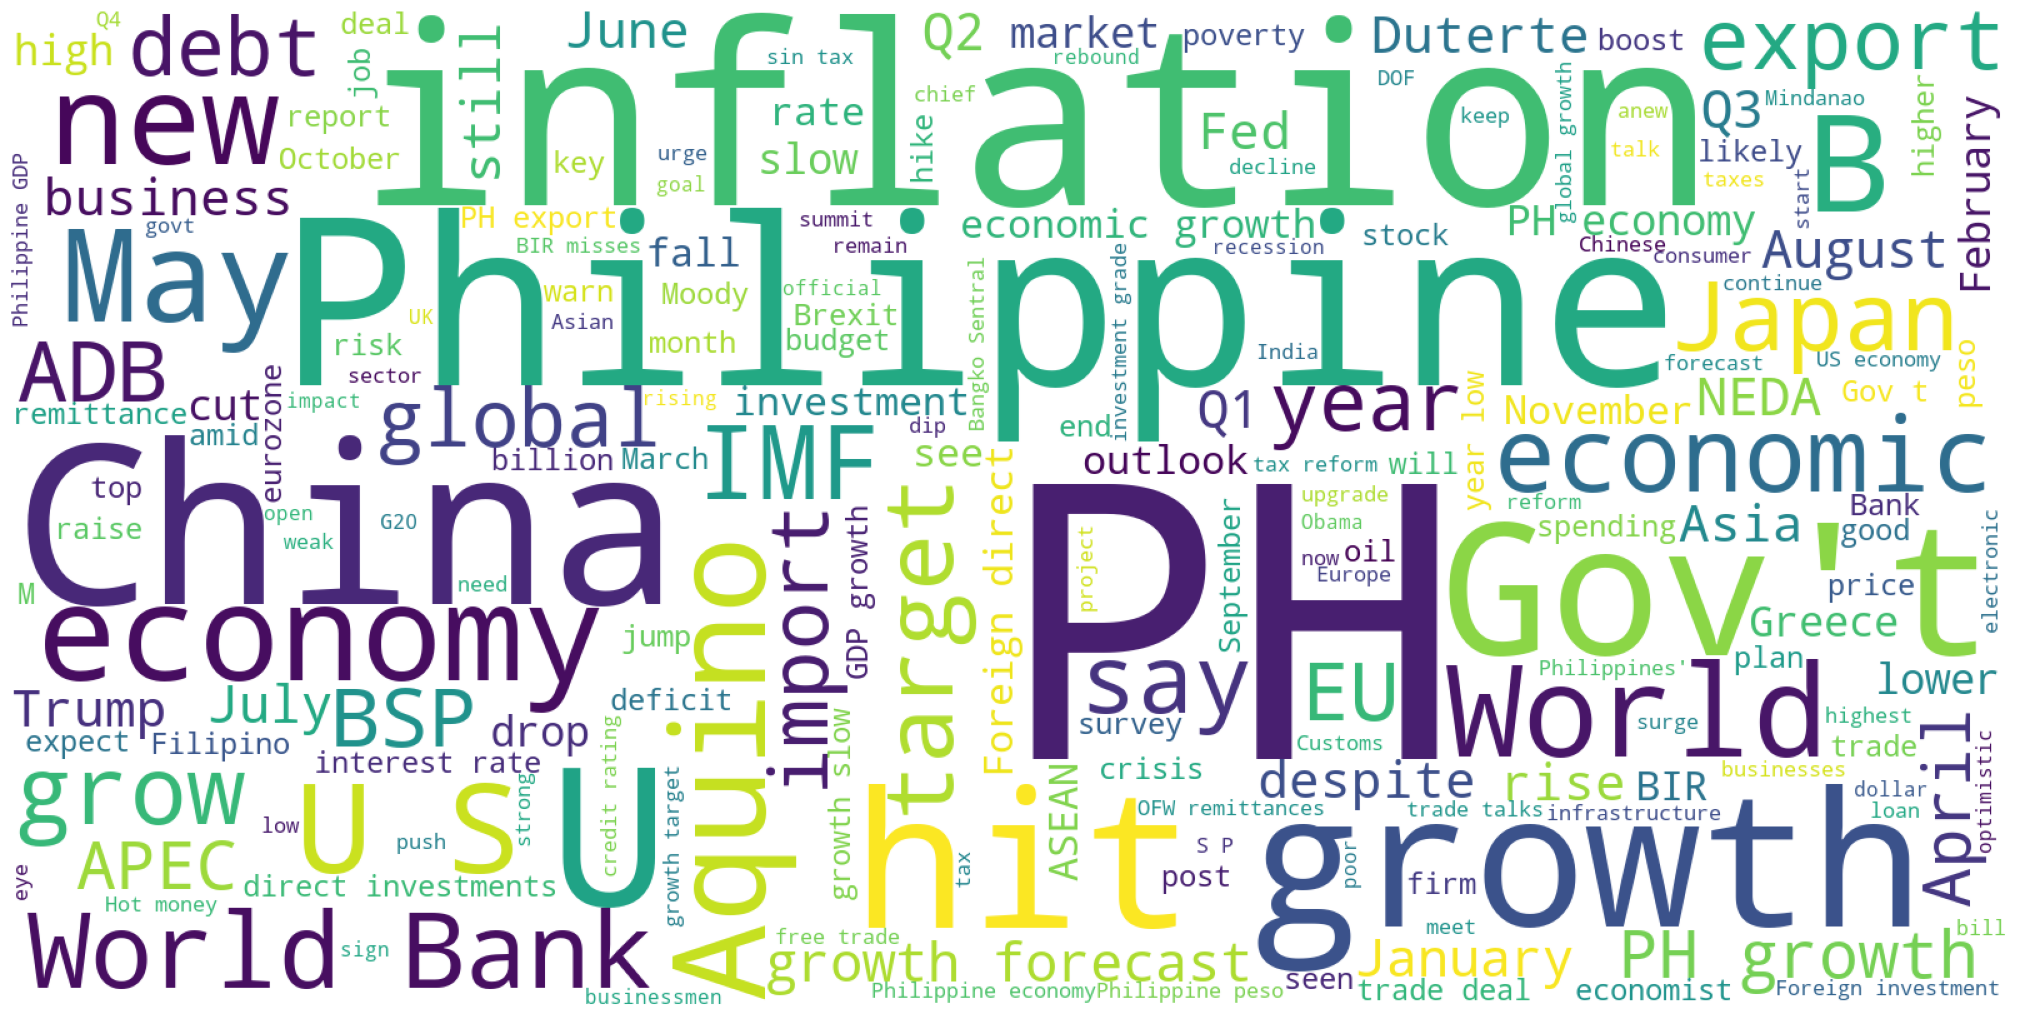

In [5]:
strings = ' '.join(list(headlines.headlines))
view_wordcloud(strings)

**Check the top words on positive, negative and neutral sentiments**

In [6]:
positive = headlines[headlines.sentiments.isin(['Amused', 'Happy', 'Inspired'])]
negative = headlines[headlines.sentiments.isin(['Afraid', 'Angry', 'Annoyed','Sad'])]
neutral = headlines[headlines.sentiments.isin(["Don't Care", 'People are divided'])]

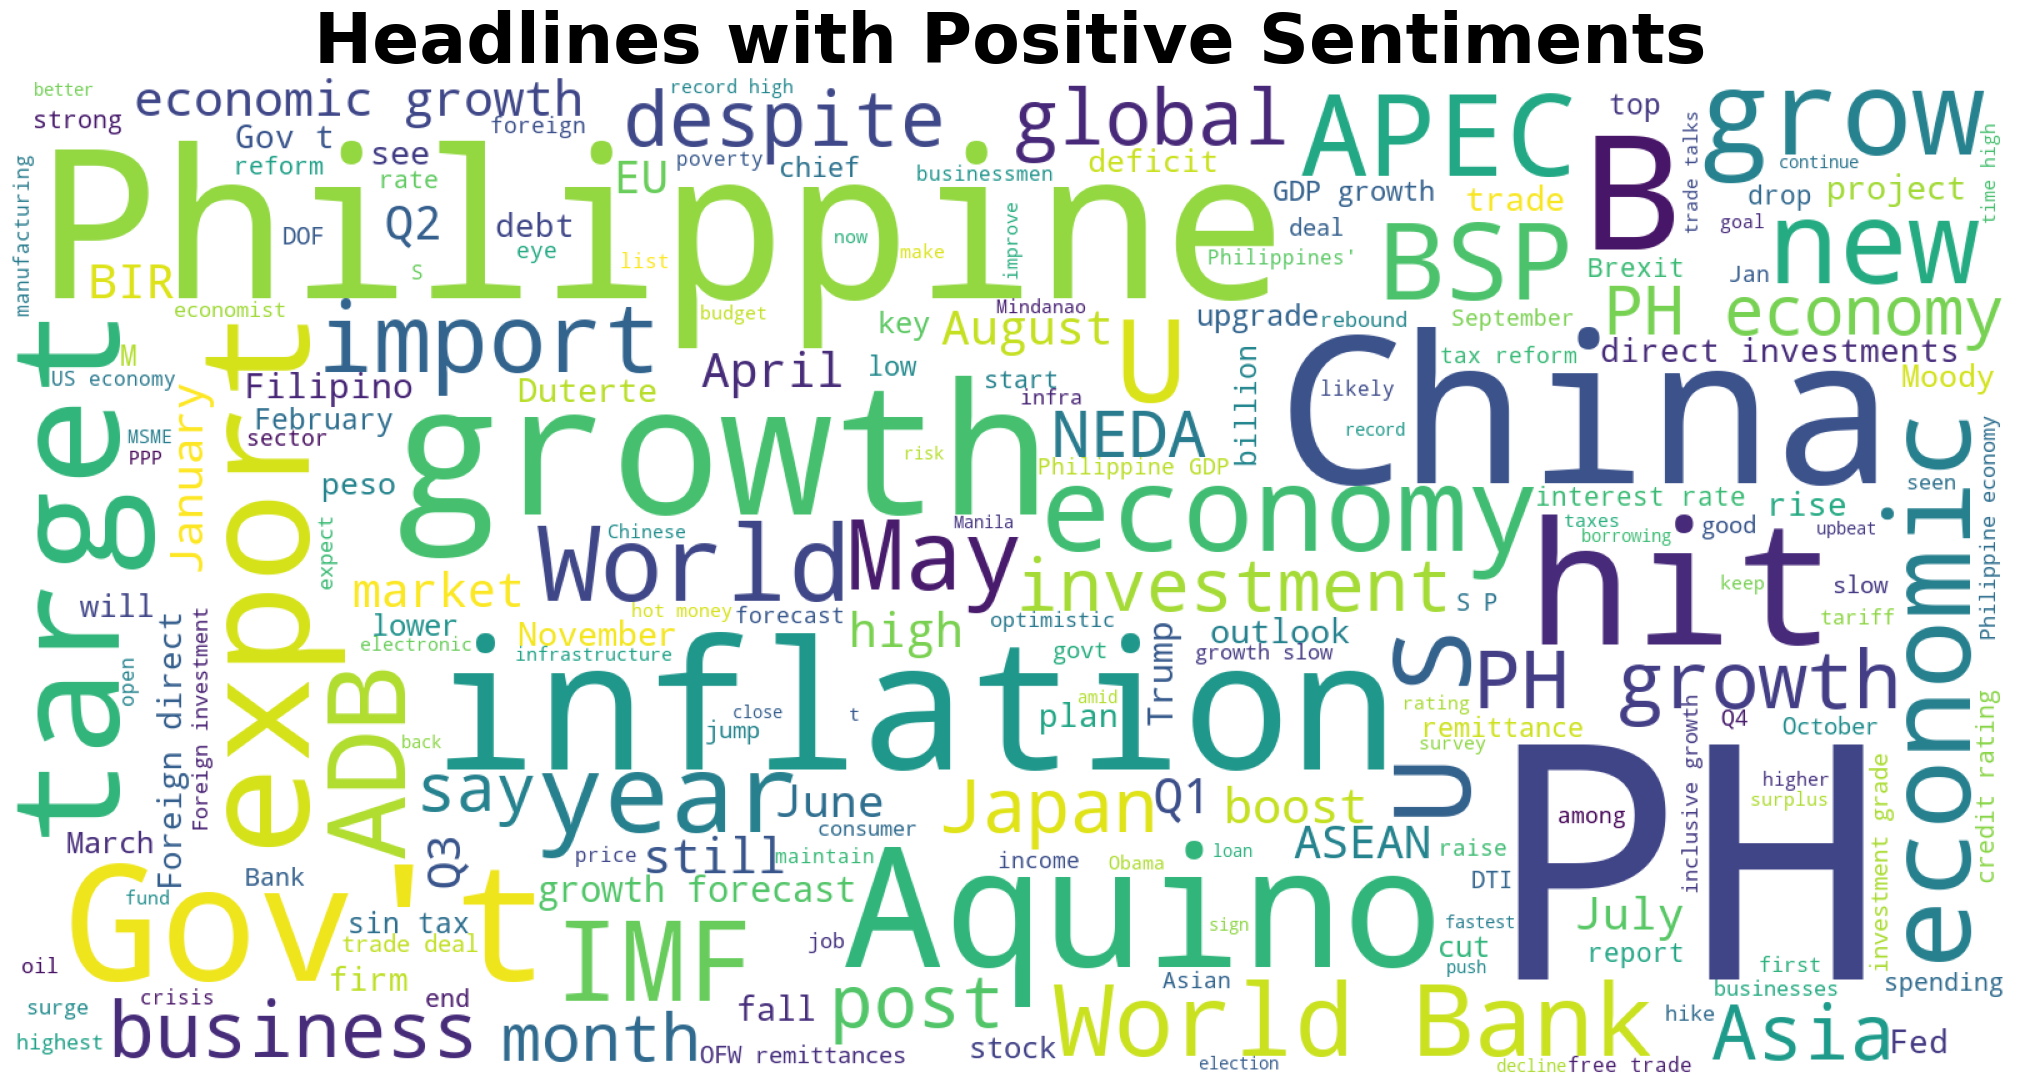

In [7]:
view_wordcloud(' '.join(list(positive.headlines)), title = 'Headlines with Positive Sentiments')

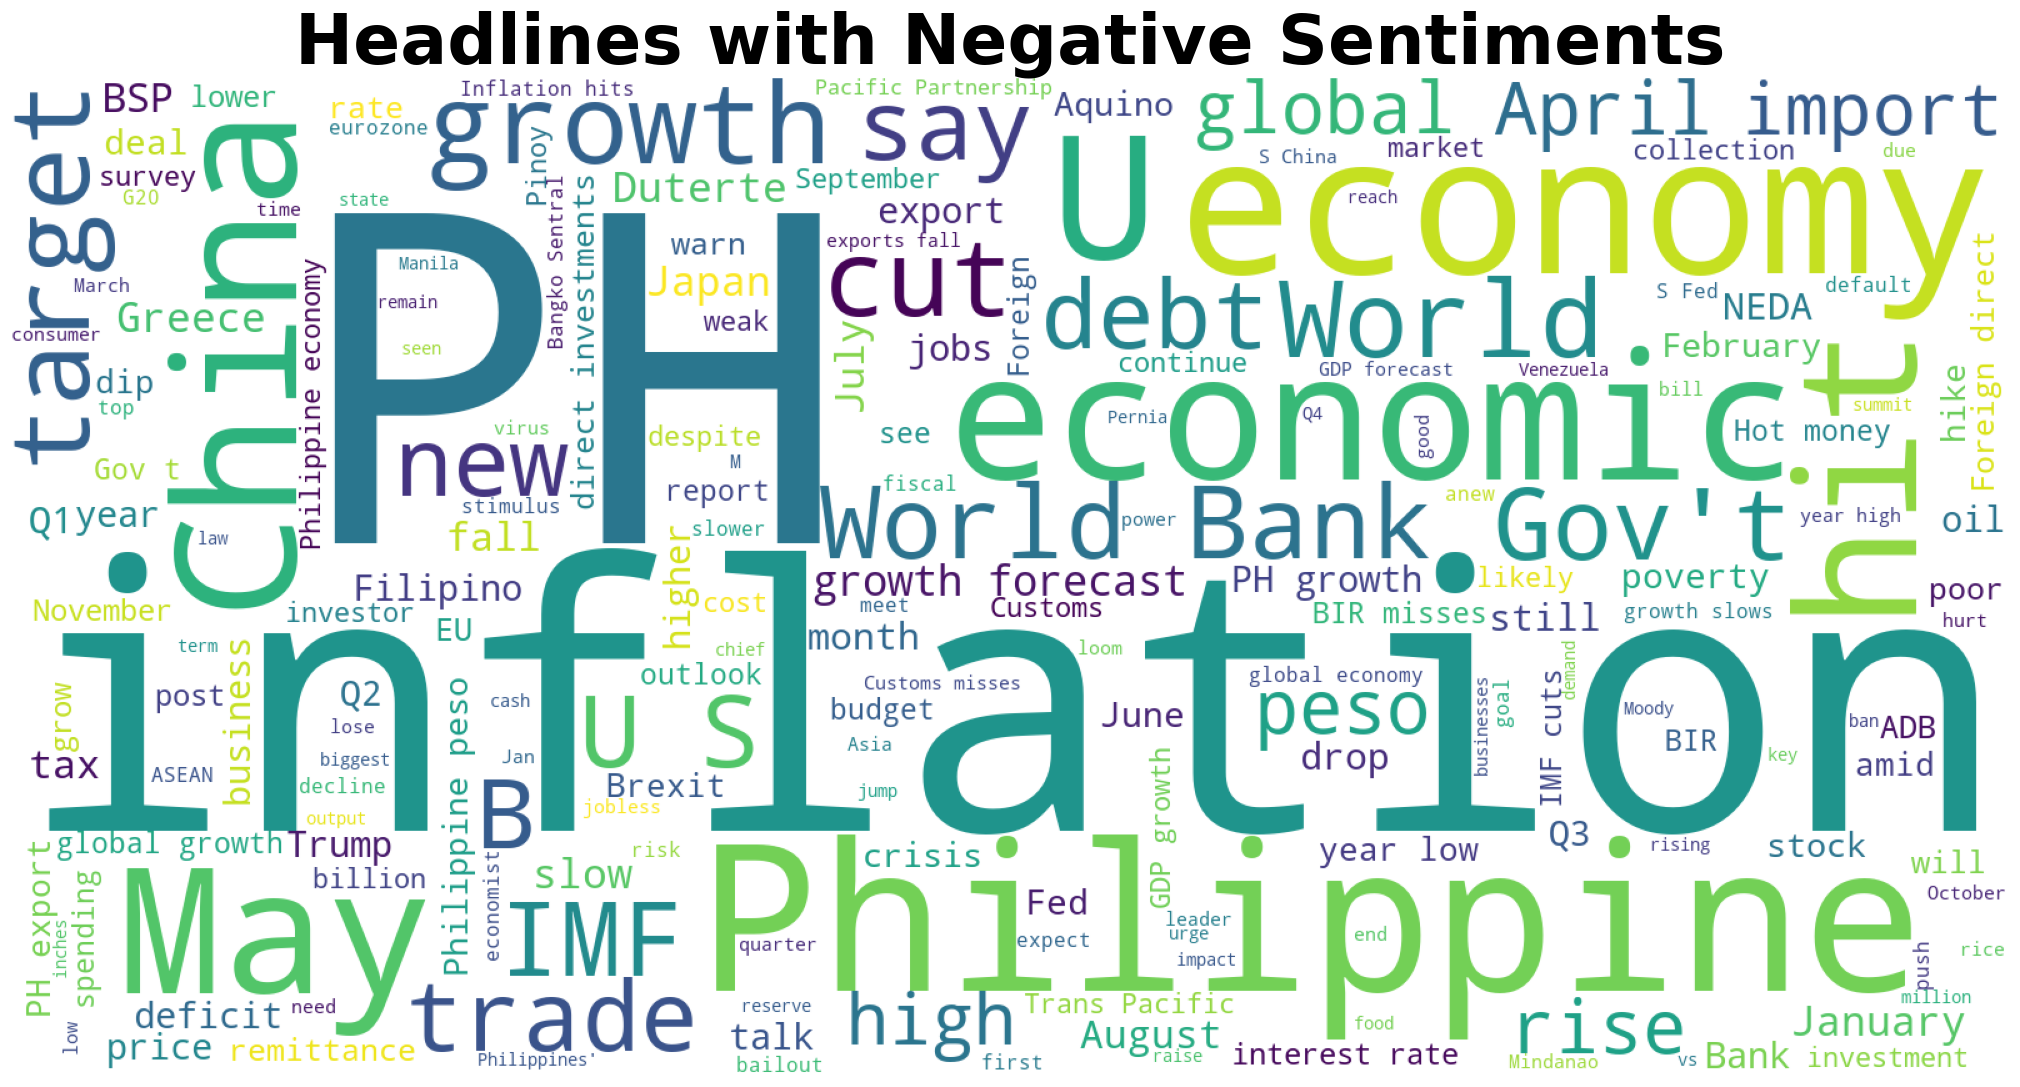

In [8]:
view_wordcloud(' '.join(list(negative.headlines)), title = 'Headlines with Negative Sentiments')

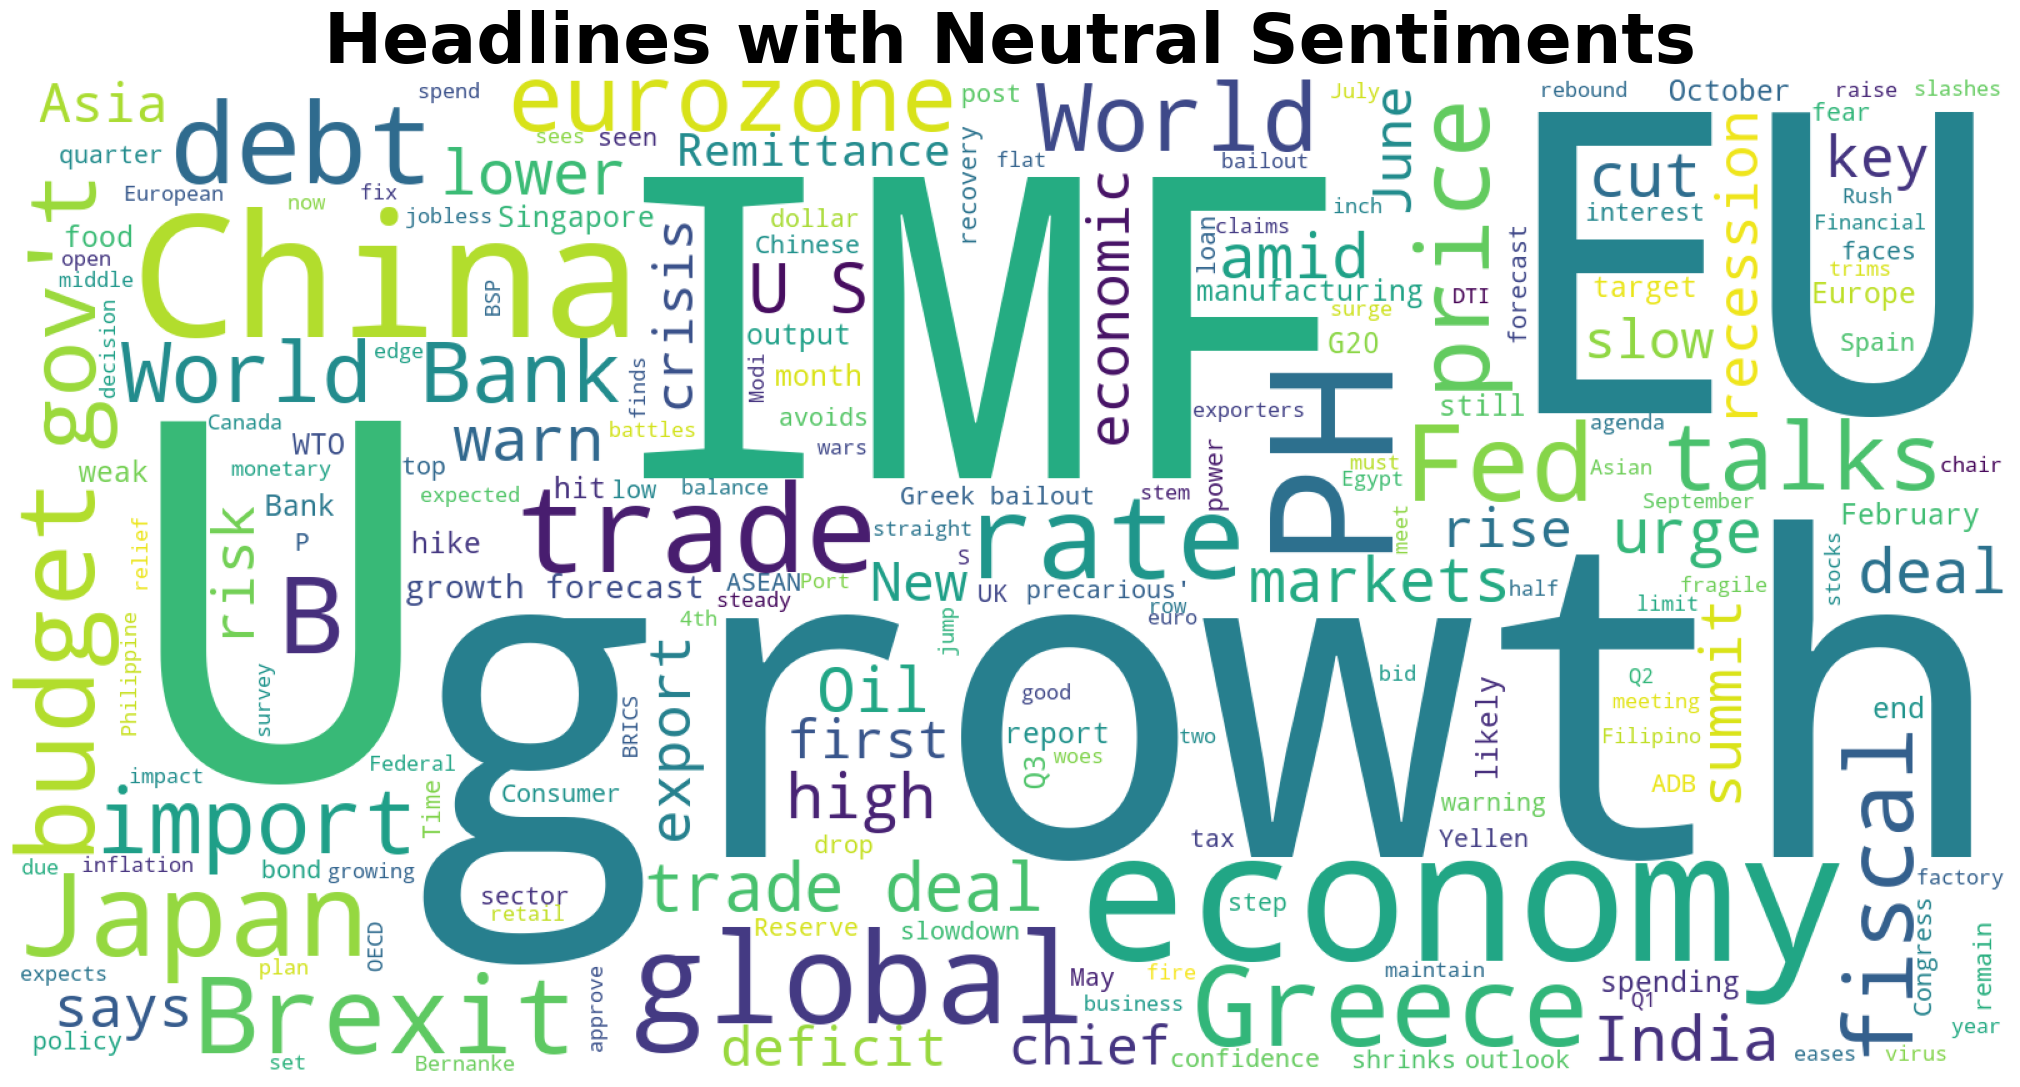

In [9]:
view_wordcloud(' '.join(list(neutral.headlines)), title = 'Headlines with Neutral Sentiments')

**Compare news headlines: Aquino vs Duterte**

In [10]:
headlines.groupby('president').size()

president
Aquino III    2054
Duterte        932
dtype: int64

In [11]:
import seaborn as sns

[Text(0.5, 0, ''), Text(0, 0.5, '')]

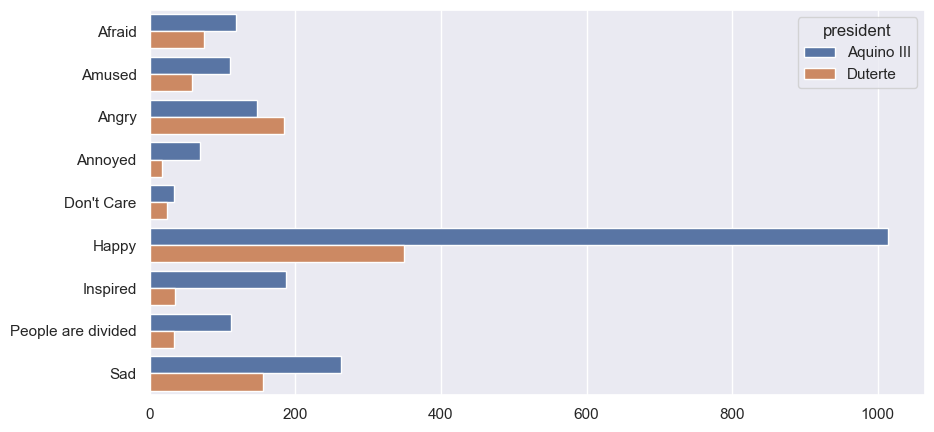

In [12]:
president = headlines.groupby(['president', 'sentiments']).size().to_frame('count').reset_index()

sns.set(rc={'figure.figsize':(10, 5)})
sns.barplot(data = president, x = 'count', y = 'sentiments', hue='president', orient = 'h')\
    .set(xlabel = None, ylabel = None)

**Summary:**
- Needs to standardize some words such as PH, PHilipppines, Philippine, gov', government
- Can compare news headlines from Aquino and Duterte admin using topic modeling
- Can create a classification model for sentiments